Image classification using PCA 

Use the ’Yale B extended data set’ - consists of 38 people with
each person having 64 different images with different lighting
conditions. Each image is of size 198 × 168 (≈ 32000 pixels)

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 18})

In [38]:
mat_contents = scipy.io.loadmat('allfaces.mat') #the dataset can be

In [39]:
mat_contents

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Sep  4 19:53:55 2014',
 '__version__': '1.0',
 '__globals__': [],
 'faces': array([[80, 94, 59, ...,  3,  4,  4],
        [81, 87, 67, ...,  4,  4,  3],
        [80, 88, 66, ...,  2,  4,  4],
        ...,
        [14,  7,  6, ...,  0,  1,  1],
        [14,  9,  6, ...,  1,  1,  0],
        [11,  8,  7, ...,  1,  1,  2]], dtype=uint8),
 'n': array([[192]], dtype=uint8),
 'm': array([[168]], dtype=uint8),
 'sub': array([[(array([[39]], dtype=uint8), array([[70, 84, 88, ...,  3,  4,  4],
                [74, 83, 95, ...,  4,  4,  3],
                [69, 82, 97, ...,  2,  4,  4],
                ...,
                [ 1,  2,  3, ...,  0,  1,  1],
                [ 1,  3,  3, ...,  1,  1,  0],
                [ 2,  2,  3, ...,  1,  1,  2]], dtype=uint8), array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          

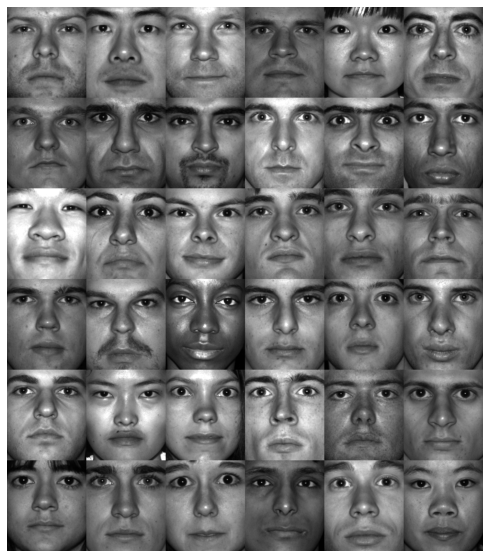

In [40]:
faces = mat_contents['faces'] #corresponding to the faces
m = int(mat_contents['m'])
n = int(mat_contents['n'])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])#flatten matrix of image as a long vector
#print the first 36 faces
allPersons = np.zeros((n*6,m*6))
count = 0

for j in range(6):
    for k in range(6):
        allPersons[j*n : (j+1)*n, k*m : (k+1)*m] = np.reshape(faces[:,np.sum(nfaces[:count])],(m,n)).T
        count += 1
img = plt.imshow(allPersons)
img.set_cmap('gray')
plt.axis('off')
plt.show()
        

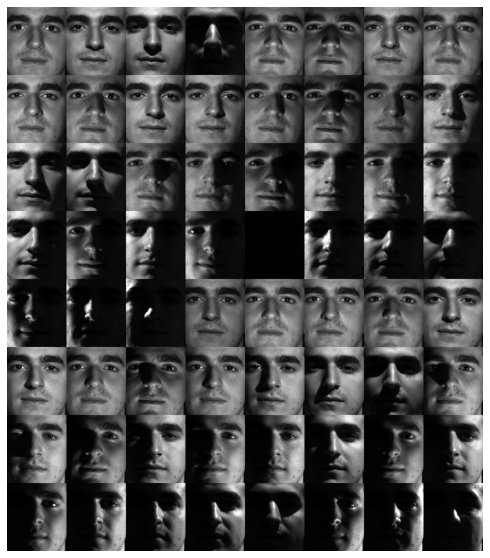

In [13]:
for person in range(len(nfaces)):
    subset = faces[:,sum(nfaces[:person]) : sum(nfaces[:(person+1)])]
    allFaces = np.zeros((n*8,m*8))
    
count = 0
    
for j in range(8):
        for k in range(8):
            if count < nfaces[person]:
                allFaces[j*n:(j+1)*n,k*m:(k+1)*m] = np.reshape(subset[:,count],(m,n)).T
                count += 1
                
img = plt.imshow(allFaces)
img.set_cmap('gray')
plt.axis('off')
plt.show() 
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

We use the first 36 people each with 64 different samples of their face for the training data.

Find eigenvectors/eigenfaces/PCs using singular value decomposition (faster)

In [29]:
# We use the first 36 people for training data
trainingFaces = faces[:,:np.sum(nfaces[:36])]
avgFace = np.mean(trainingFaces,axis=1) # size n*m by 1

# Compute eigenfaces on mean-subtracted training data
X = trainingFaces - np.tile(avgFace,(trainingFaces.shape[1],1)).T
U, S, VT = np.linalg.svd(X,full_matrices=0)

#plot the sigma values 
# fig, ax = plt.subplots()
# plt.scatter(np.arange(1,len(S)+1,1),S)
# ax.set_yscale('log')
# ax.set_xlim([0,16000])
# ax.set_ylim([10**-1,10**6])
# plt.xlabel('i')
# plt.ylabel('sigma_i')
# plt.yticks([10,10**5,10**6,10**8])
# plt.title('Singular values (sigma_i)')
#Sigma values are related to C_y = 1/(n-1)[D] where D is the eigenvalue diag matrix 
#to get variances, find D 

Text(0.5, 1.0, 'Vaiance captured by using the first r eigenfaces')

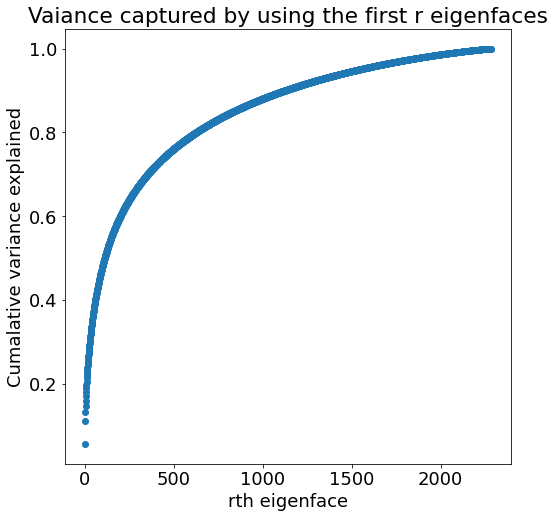

In [17]:
C= [(s**2)/(len(U)-1) for s in S]
fullvar = sum(S**2/(len(U)-1))
#get s in ascending order
S = np.sort(S)[::-1]
ratio =[sum(S[:i])/sum(S) for i in range(1, len(S)+1)]
fig, ax = plt.subplots()
ax.set_ylabel('Cumalative variance explained')
ax.set_xlabel('rth eigenface')
ax.scatter(np.arange(1,len(S)+1,1), ratio)
plt.title('Vaiance captured by using the first r eigenfaces')
    

The average face

(-0.5, 167.5, 191.5, -0.5)

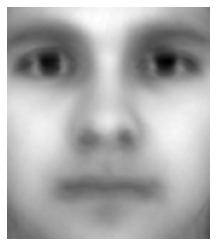

In [19]:
# plt.set_ylim(bottom=0.)
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(avgFace,(m,n)).T) #look at average face 
img_avg.set_cmap('gray')
plt.axis('off')

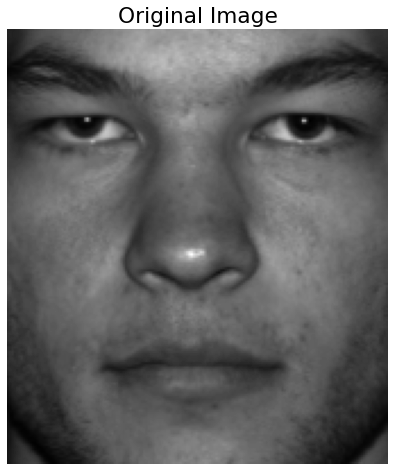

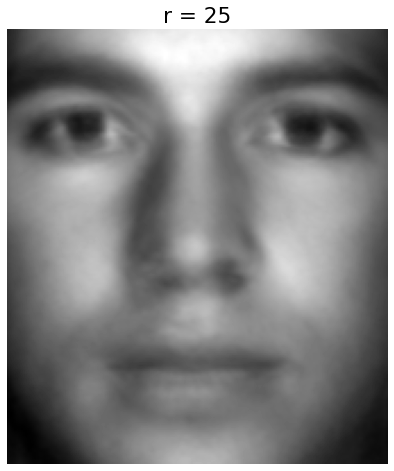

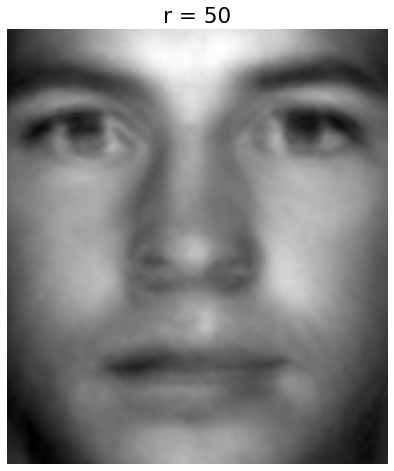

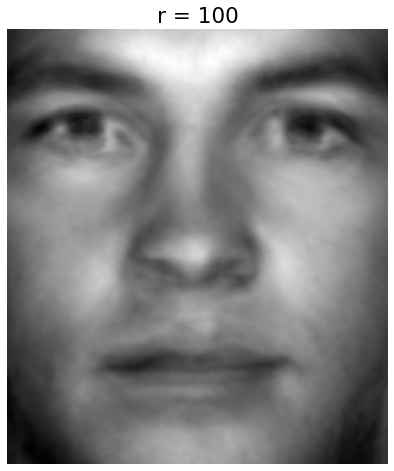

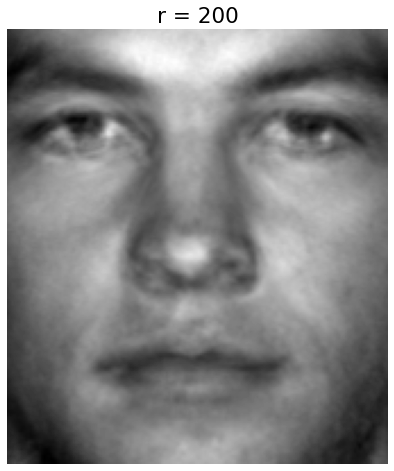

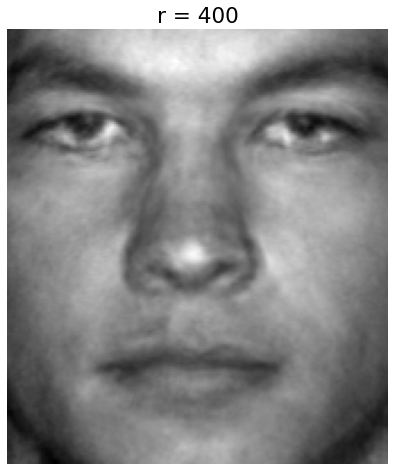

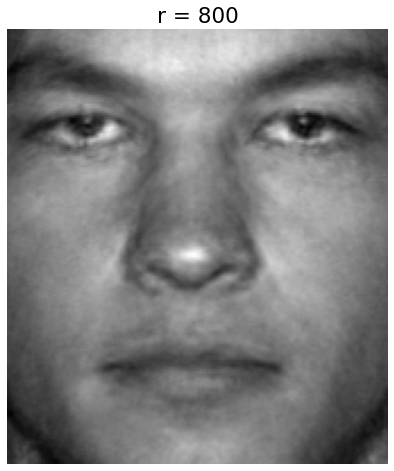

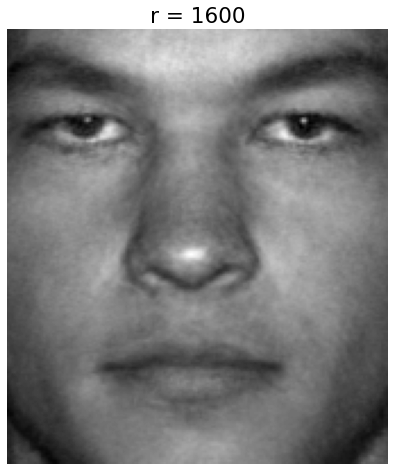

In [23]:
# Now show eigenface reconstruction of image that was omitted from test set

testFace = faces[:,np.sum(nfaces[:36])] # First face of person 37
plt.imshow(np.reshape(testFace,(m,n)).T)
plt.set_cmap('gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

testFaceMS = testFace - avgFace
r_list = [25, 50, 100, 200, 400, 800, 1600]

for r in r_list:
    reconFace = avgFace + U[:,:r]  @ U[:,:r].T @ testFaceMS
    img = plt.imshow(np.reshape(reconFace,(m,n)).T)
    img.set_cmap('gray')
    plt.title('r = ' + str(r))
    plt.axis('off')
    plt.show()
   

/var/folders/3t/wf0yp5811rq2dbc0ljc7hmzh0000gq/T/ipykernel_9051/1562645851.py:16: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(PCACoordsP1[0,:],PCACoordsP1[1,:],'d',Color='k',label='Person 2')
/var/folders/3t/wf0yp5811rq2dbc0ljc7hmzh0000gq/T/ipykernel_9051/1562645851.py:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(PCACoordsP2[0,:],PCACoordsP2[1,:],'^',Color='r',label='Person 7')


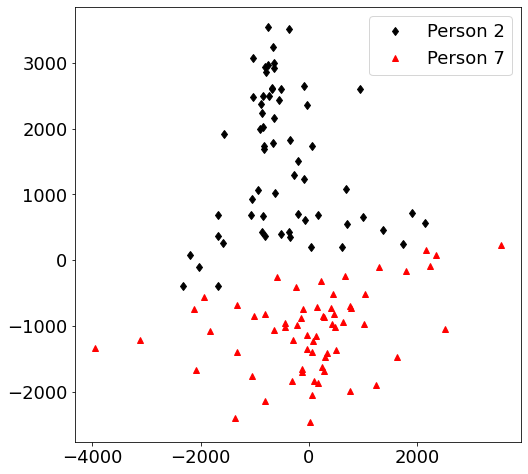

In [32]:
 ## Project person 2 and 7 onto PC5 and PC6

P1num = 2 # Person number 2
P2num = 7 # Person number 7

P1 = faces[:,np.sum(nfaces[:(P1num-1)]):np.sum(nfaces[:P1num])]
P2 = faces[:,np.sum(nfaces[:(P2num-1)]):np.sum(nfaces[:P2num])]

P1 = P1 - np.tile(avgFace,(P1.shape[1],1)).T
P2 = P2 - np.tile(avgFace,(P2.shape[1],1)).T

PCAmodes = [5, 6] # Project onto PCA modes 5 and 6
PCACoordsP1 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P1
PCACoordsP2 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P2

plt.plot(PCACoordsP1[0,:],PCACoordsP1[1,:],'d',Color='k',label='Person 2')
plt.plot(PCACoordsP2[0,:],PCACoordsP2[1,:],'^',Color='r',label='Person 7')

plt.legend()
plt.show()


In [41]:
X = faces.T # Data usual format of sample rows and feature columns
y = np.zeros((faces.shape[1], 1)) # Creating labels

In [95]:
X = faces.T # Data usual format of sample rows and feature columns
y = np.zeros((faces.shape[1], 1)) # Creating labels
j = 0
classes = list(range(len(nfaces)))
for i in nfaces:
  y[j:j+i] = classes.pop(0)
  j = j + i
  
X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size=0.4, shuffle=True, stratify=y)

from sklearn.decomposition import PCA
from sklearn.svm import SVC

n_components = 150

pca = PCA(n_components=n_components).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, m, n))

print("Projecting the input data on the eigenfaces orthonormal basis")
X_tv_pca = pca.transform(X_tv)
X_test_pca = pca.transform(X_test)

# https://github.com/heliumind/eigenfaces/blob/master/code/PCA.ipynb

Projecting the input data on the eigenfaces orthonormal basis


In [125]:
print("Fitting the classifier to the training set")
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid
)

clf = clf.fit(X_tv_pca, y_tv.ravel())

print(clf.best_estimator_)

Fitting the classifier to the training set
SVC(C=1000.0, class_weight='balanced', gamma=0.0001)


In [109]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test_pca)

target_names = [f"Person{n}" for n in range(1,39)]

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Person1       0.92      0.92      0.92        26
     Person2       0.88      0.88      0.88        25
     Person3       0.86      1.00      0.93        25
     Person4       1.00      0.77      0.87        26
     Person5       0.96      0.96      0.96        25
     Person6       0.89      1.00      0.94        25
     Person7       0.74      0.96      0.83        26
     Person8       0.96      0.92      0.94        25
     Person9       1.00      1.00      1.00        25
    Person10       1.00      0.88      0.94        26
    Person11       1.00      1.00      1.00        24
    Person12       0.96      1.00      0.98        23
    Person13       1.00      1.00      1.00        24
    Person14       1.00      0.84      0.91        25
    Person15       0.93      1.00      0.96        25
    Person16       1.00      0.84      0.91        25
    Person17       1.00      1.00      1.00        25
    Person18       1.00    

In [100]:
clf.score(X_test_pca, y_test)

0.9315352697095436

In [110]:
print("Fitting the classifier to the training set")
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid
)
clf = clf.fit(X_tv_pca, y_tv.ravel())

print(clf.best_estimator_)

Fitting the classifier to the training set
SVC(C=1000.0, class_weight='balanced', gamma=0.0001)


In [122]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_tv_pca, y_train.ravel())
y_pred = knn.predict(X_test_pca)

In [127]:
accuracy_score(y_test, y_pred)

0.9730290456431535